In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

screenViewer=pd.read_csv('..\\..\\dataPreprocessing\\k_movie_2.csv')

In [2]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


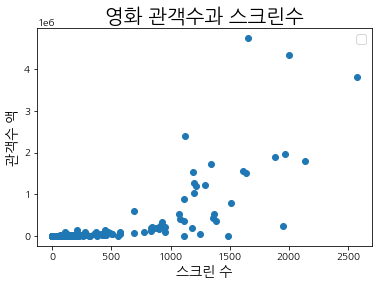

In [3]:
#스크린 수에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
screenViewer=screenViewer.dropna(subset=['VIEWNG_NMPR_CO', 'TOT_SCRN_CO'])
fig, ax = plt.subplots()
ax.plot(screenViewer['TOT_SCRN_CO'],
        screenViewer['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 관객수과 스크린수', fontsize=20)
plt.xlabel('스크린 수', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

In [4]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(screenViewer['VIEWNG_NMPR_CO']))
print(shapiro(screenViewer['TOT_SCRN_CO']))

#등분산성 - 등분산성을 따르지 않음
print(levene(screenViewer['VIEWNG_NMPR_CO'], screenViewer['TOT_SCRN_CO'], center='median'))

ShapiroResult(statistic=0.24783772230148315, pvalue=1.4893745883518033e-35)
ShapiroResult(statistic=0.5481191873550415, pvalue=2.45968141685833e-29)
LeveneResult(statistic=19.536654815713423, pvalue=1.140302919635435e-05)


In [5]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음
print(stats.spearmanr(screenViewer['VIEWNG_NMPR_CO'],screenViewer['TOT_SCRN_CO']))

SpearmanrResult(correlation=0.8361714039866193, pvalue=6.934509410367995e-95)


In [6]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ TOT_SCRN_CO',data=screenViewer).fit() ## 단순선형회귀모형 적합

In [7]:
fit.summary()
#R제곱과 수정 R제곱 수치가 0.558 ~ 0.557로 나타났다. : 50%정도의 자료만 설명 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     449.7
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.13e-65
Time:                        13:19:23   Log-Likelihood:                -5054.5
No. Observations:                 358   AIC:                         1.011e+04
Df Residuals:                     356   BIC:                         1.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.907e+04   1.94e+04     -3.554      0.000   -1.07e+05   -3.08e+04
TOT_SCRN_CO   875.7715     41.300     21.205      0.000     794.548     956.995
==============================================================================
Omnibus:                      382.689   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32558.965
Skew:                           4.363   Prob(JB):                         0.00
Kurtosis:                      48.897   Cond. No.                         527.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
## 변수의 선언
x = screenViewer['TOT_SCRN_CO']
y = screenViewer['VIEWNG_NMPR_CO']

## 모델의 선언
screenViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
screenViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '10000개의 스크린 수 관람 인원 예측 :{}'.format(screenViewer_linearRegression.predict([[10000]])[0])
    , 'X변수 계수: {}'.format(screenViewer_linearRegression.coef_[0])
    , sep = '\n')

10000개의 스크린 수 관람 인원 예측 :8688648.401800508
X변수 계수: 875.7715174434383


In [9]:
#기울기
print(screenViewer_linearRegression.coef_)

#절편
print(screenViewer_linearRegression.intercept_)

[875.77151744]
-69066.77263387541


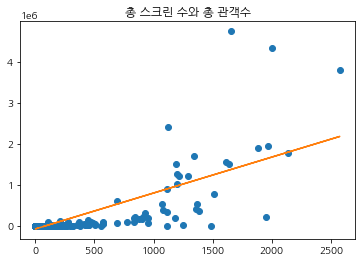

In [11]:
plt.plot(x, y, 'o')
plt.title("총 스크린 수와 총 관객수")
plt.plot(x,screenViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()